# 作業目標:¶
利用手寫辨識資料說明MLP 中, 神經網路層的多寡跟預測結果的差異

# 作業重點:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))


# 資料預處理

In [182]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [183]:
#載入手寫辨識的資料集
from keras.datasets import mnist
from keras.datasets import mnist
(x_train_image,y_train_label),(x_test_image,y_test_label)= mnist.load_data()
print('x_train_image_shape={}, y_train_image_shape={}'.format(x_train_image.shape, y_train_label.shape))
print('x_test_image_shape={}, y_test_label_shape={}'.format(x_test_image.shape, y_test_label.shape))

x_train_image_shape=(60000, 28, 28), y_train_image_shape=(60000,)
x_test_image_shape=(10000, 28, 28), y_test_label_shape=(10000,)


In [184]:
#指定測試集與訓練資料集
x_Train = x_train_image.reshape(x_train_image.shape[0], 28, 28, 1).astype('float32')
x_Test = x_test_image.reshape(x_test_image.shape[0], 28, 28, 1).astype('float32')
print('x_train_image_shape={}'.format(x_train_image.shape))
print('x_test_image_shape={}'.format(x_train_image.shape))

x_train_image_shape=(60000, 28, 28)
x_test_image_shape=(60000, 28, 28)


In [185]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255 

In [186]:
#把LABEL轉成 NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [187]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [188]:
#宣告採用序列模型
model = Sequential()

In [189]:
#set a cnn network
model.add(Conv2D(filters = 16, kernel_size = (5, 5), padding = 'same', input_shape = (28, 28, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 36, kernel_size = (5, 5), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [190]:
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)             

# 訓練模型

In [191]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [192]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 23s 471us/step - loss: 0.2454 - accuracy: 0.9245 - val_loss: 0.0602 - val_accuracy: 0.9812
Epoch 2/10
48000/48000 [==============================] - 22s 452us/step - loss: 0.0937 - accuracy: 0.9718 - val_loss: 0.0456 - val_accuracy: 0.9865
Epoch 3/10
48000/48000 [==============================] - 23s 470us/step - loss: 0.0722 - accuracy: 0.9779 - val_loss: 0.0467 - val_accuracy: 0.9870
Epoch 4/10
48000/48000 [==============================] - 23s 478us/step - loss: 0.0595 - accuracy: 0.9825 - val_loss: 0.0397 - val_accuracy: 0.9883
Epoch 5/10
48000/48000 [==============================] - 23s 470us/step - loss: 0.0493 - accuracy: 0.9855 - val_loss: 0.0336 - val_accuracy: 0.9911
Epoch 6/10
48000/48000 [==============================] - 23s 469us/step - loss: 0.0432 - accuracy: 0.9866 - val_loss: 0.0360 - val_accuracy: 0.9908
Epoch 7/10
48000/48000 [==============================] 

# 以圖形顯示訓練過程

In [193]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

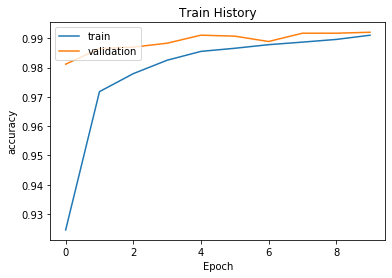

In [194]:
show_train_history(train_history,'accuracy','val_accuracy')

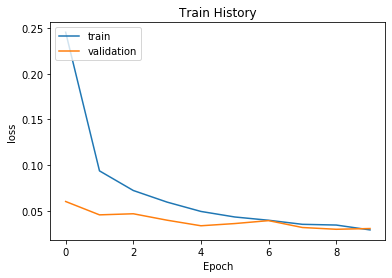

In [195]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [196]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 96us/step

accuracy= 0.9934999942779541
